In [51]:
.import pandas as pd

#Charger le fichier
df = pd.read_csv("/analyze_movie/datas/raw/movie_genre_stats.csv")

In [52]:
df.head()

,index,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
0,0,Adventure,1995,29,771507571,177358047,1590901682,Toy Story,150148222,3.096160e+08
1,1,Adventure,1996,34,1290490033,291966054,2618935504,Independence Day,306169255,6.213435e+08
2,2,Adventure,1997,23,881902843,192135684,1723457085,Men in Black,250650052,4.898324e+08
3,3,Adventure,1998,29,1614467732,344236174,3087798481,Armageddon,201578182,3.855344e+08
4,4,Adventure,1999,27,1612432107,317407880,2847148684,Star Wars Ep. I: The Phantom Menace,430443350,7.600545e+08


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   index                                           300 non-null    int64  
 1   Genre                                           300 non-null    object 
 2   Year                                            300 non-null    int64  
 3   Movies Released                                 300 non-null    int64  
 4   Gross                                           300 non-null    int64  
 5   Tickets Sold                                    300 non-null    int64  
 6   Inflation-Adjusted Gross                        300 non-null    int64  
 7   Top Movie                                       300 non-null    object 
 8   Top Movie Gross (That Year)                     300 non-null    int64  
 9   Top Movie Inflation-Adjusted Gross (That Ye

['Adventure' 'Action' 'Drama' 'Comedy' 'Thriller or Suspense' 'Horror'
 'Romantic Comedy' 'Musical' 'Documentary' 'Dark Comedy' 'Western'
 'Concert or Performance' 'Multiple Genres' 'Reality']
1005
{'Adventure': 1005, 'Action': 956, 'Drama': 4997, 'Comedy': 2230, 'Thriller or Suspense': 1024, 'Horror': 553, 'Romantic Comedy': 574, 'Musical': 170, 'Documentary': 2143, 'Dark Comedy': 174, 'Western': 77, 'Concert or Performance': 63, 'Multiple Genres': 39, 'Reality': 5}


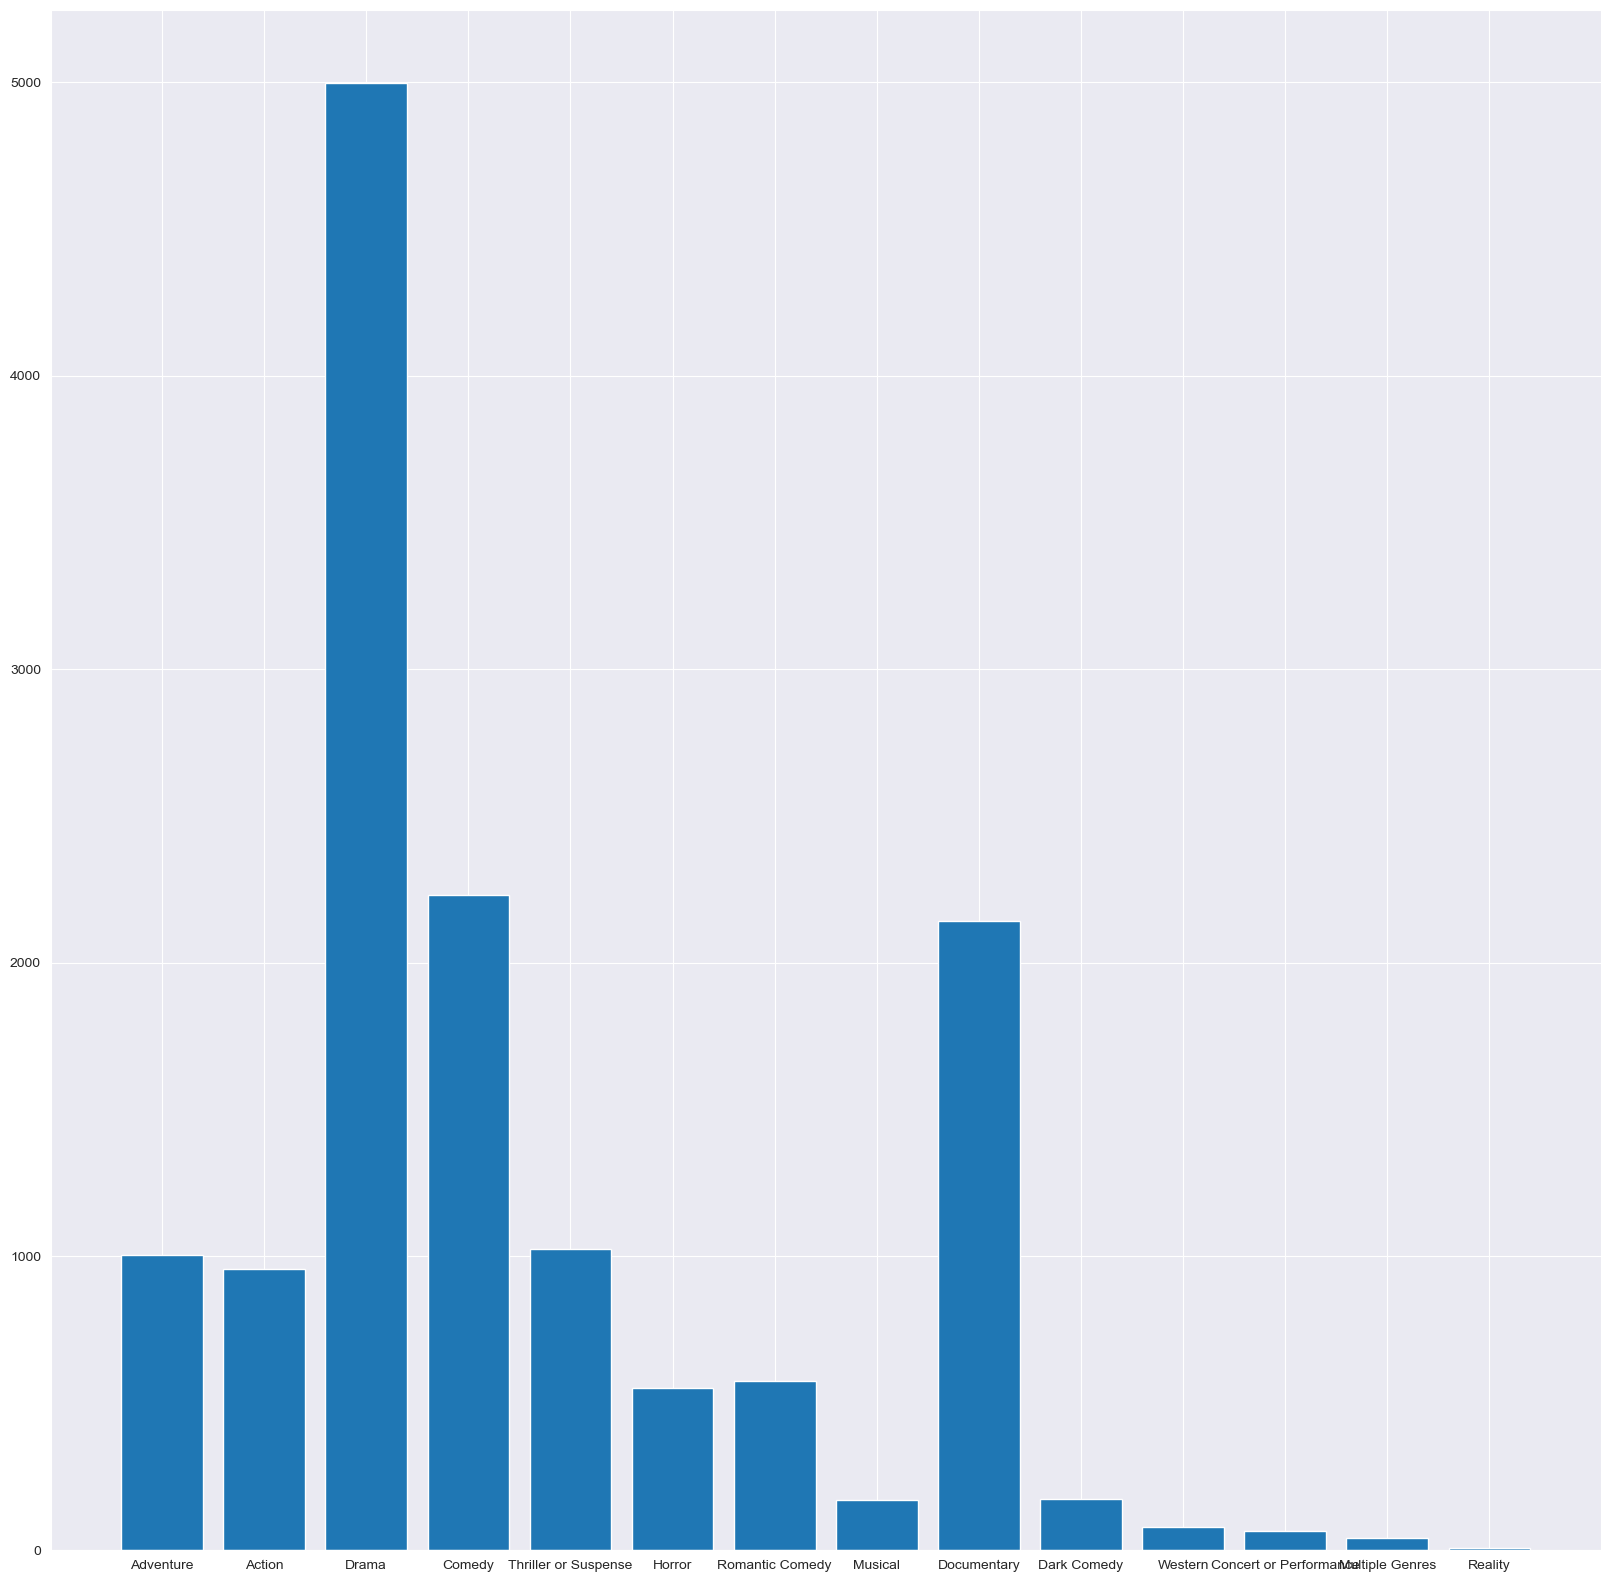

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

genres_unique = df['Genre'].unique()
print(genres_unique)

#loc retourne un objet pour faire des aggrégations
# 1- expression boolean => condition pour grouper la colonne
# 2- les valeurs à regrouper pour effectuer une aggrégation dessus
print(df.loc[df.Genre == "Adventure",]["Movies Released"].sum())

genre_movie_release = {}
for genre in genres_unique:
    genre_movie_release[genre] = df.loc[df.Genre == genre,]["Movies Released"].sum()

print (genre_movie_release)

#sns.barplot(genre_movie_release)
fig, ax = plt.subplots(figsize=(20, 20))
ax.bar(genre_movie_release.keys(), genre_movie_release.values())
plt.show()


{'Adventure': 8480812819, 'Action': 6286733017, 'Drama': 5474189407, 'Comedy': 5040638417, 'Thriller or Suspense': 2671463214, 'Horror': 1572563195, 'Romantic Comedy': 1557896913, 'Musical': 547432661, 'Documentary': 322824020, 'Dark Comedy': 208096184, 'Western': 146128846, 'Concert or Performance': 49778298, 'Multiple Genres': 3676146, 'Reality': 74035}


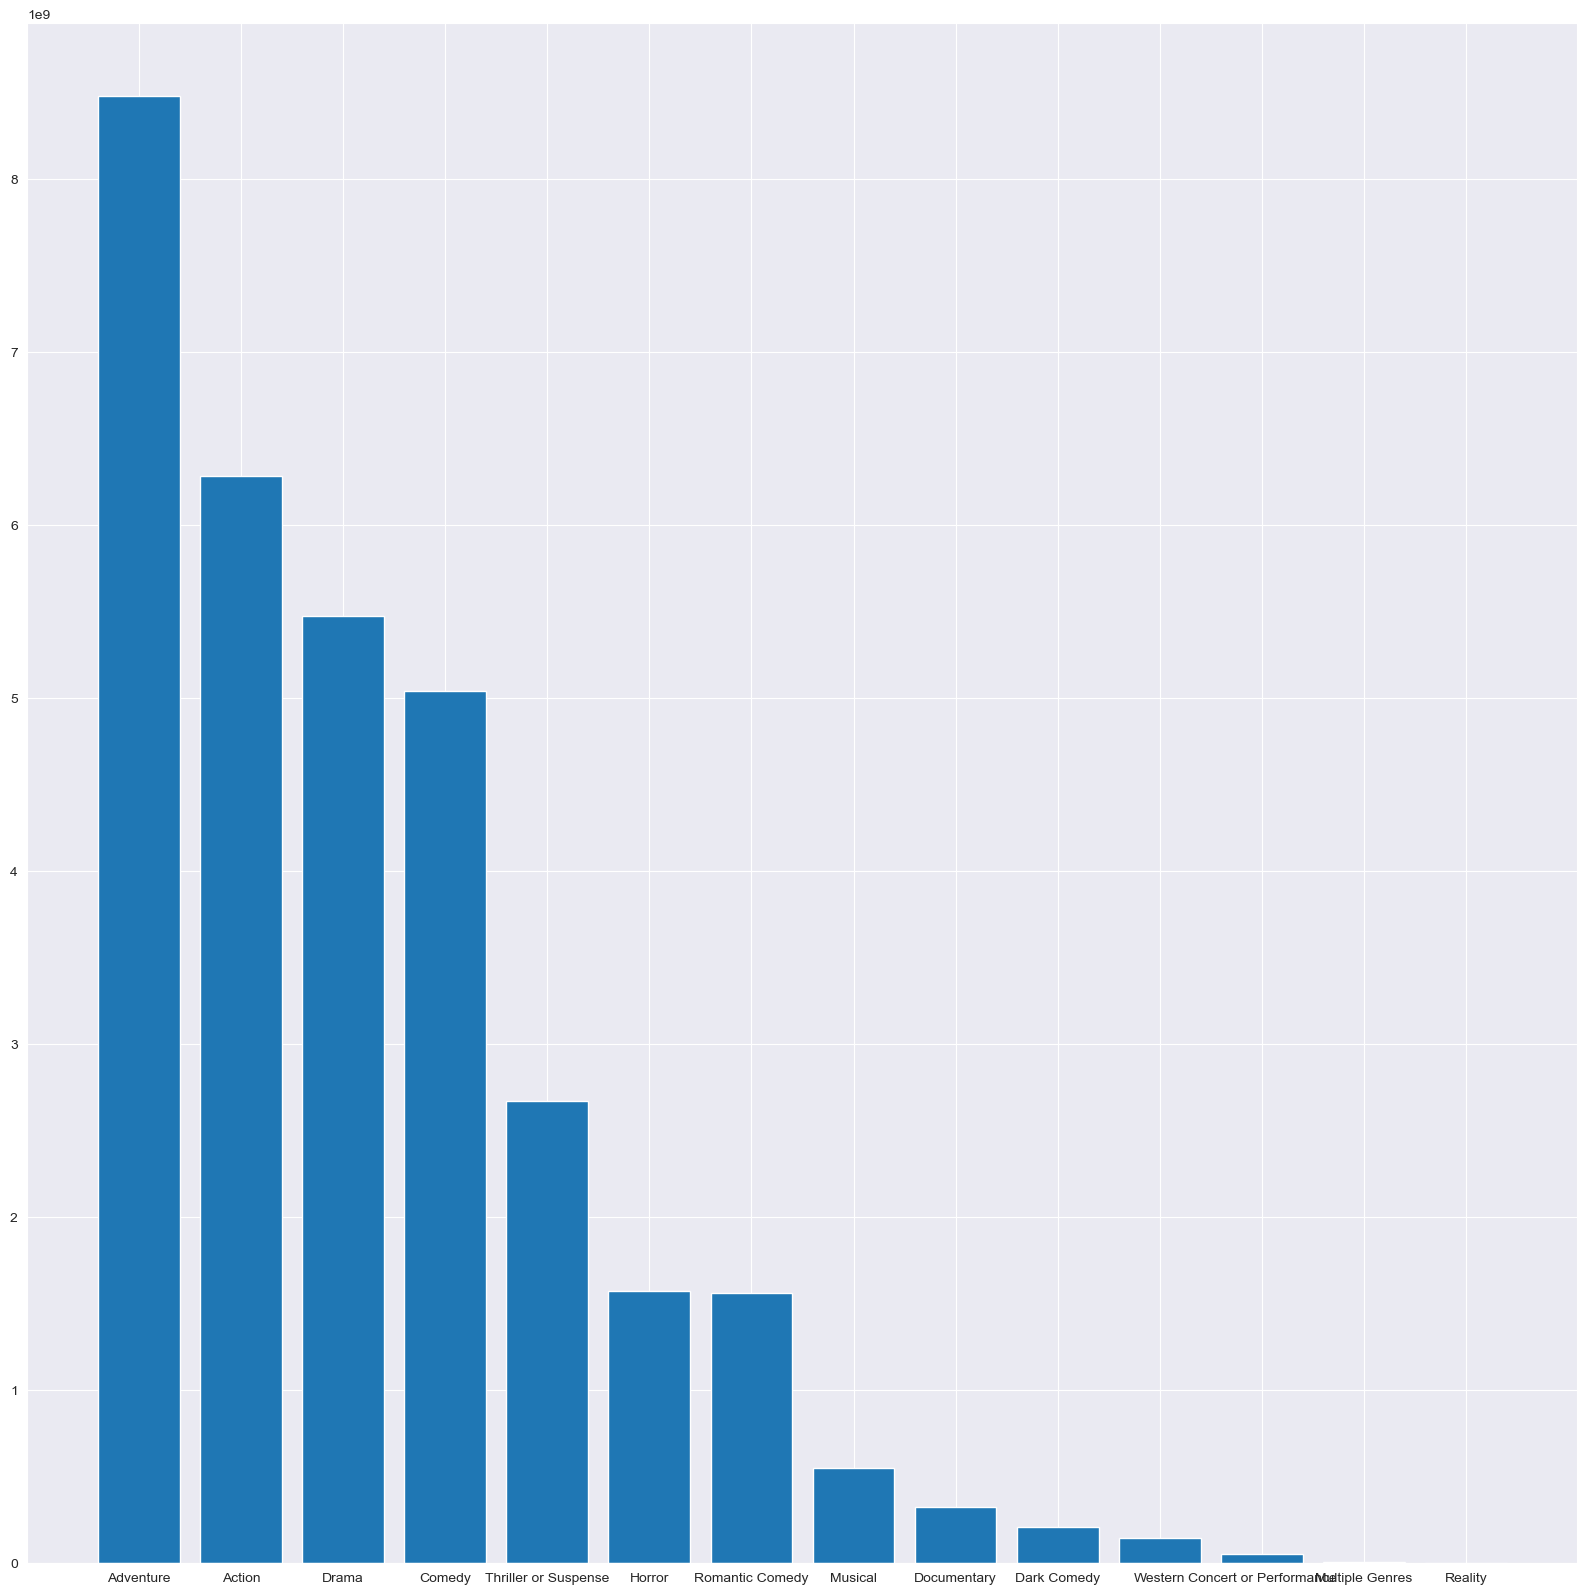

In [62]:
genres_unique = df['Genre'].unique()

genre_movie_sold = {}
for genre in genres_unique:
    genre_movie_release[genre] = df.loc[df.Genre == genre,]["Tickets Sold"].sum()

print (genre_movie_release)

#sns.barplot(genre_movie_release)
fig, ax = plt.subplots(figsize=(20, 20))
ax.bar(genre_movie_release.keys(), genre_movie_release.values())
plt.show()


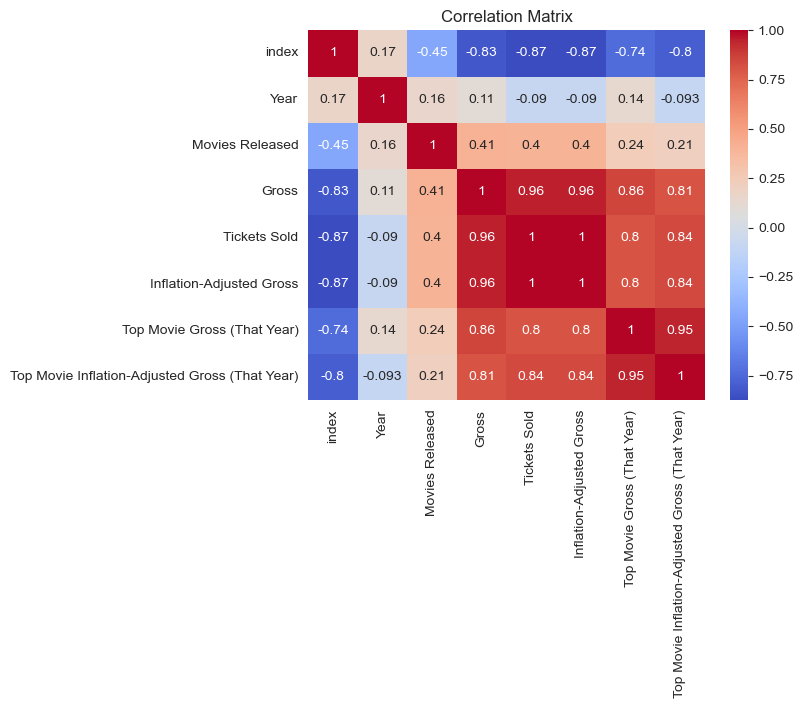

In [66]:
import scipy.stats as stats

corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()